In [2]:
!pip install seaborn

In [32]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv('song spotify-2023.csv')
df.head()

track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703                  43  ...  125   B  Major   
1                 48  133716286                  48  ...   92  C#  Major   
2                113  140003974                  94  ...  138   F  Major   
3                100  800840817                 116  ...  170   A  Major   
4                 50  303236322                  84  ...  144   A  Minor   

  danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0             80         89       83             31                   0   
1             71         61       74              7                   0   
2             51         32       53             17                   0   
3             55         58       72             11                   0   
4             65         23       80             14                  63   

   liveness_%  speechiness_%  
0           8              4  
1          10              4  
2          31              6  
3          11             15  
4          11              6  

[5 rows x 24 columns]

# Data Exploration

In [34]:
df.shape

(953, 24)

In [35]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

In [36]:
df.describe().T

count         mean          std     min     25%     50%  \
artist_count          953.0     1.556139     0.893044     1.0     1.0     1.0   
released_year         953.0  2018.238195    11.116218  1930.0  2020.0  2022.0   
released_month        953.0     6.033578     3.566435     1.0     3.0     6.0   
released_day          953.0    13.930745     9.201949     1.0     6.0    13.0   
in_spotify_playlists  953.0  5200.124869  7897.608990    31.0   875.0  2224.0   
in_spotify_charts     953.0    12.009444    19.575992     0.0     0.0     3.0   
in_apple_playlists    953.0    67.812172    86.441493     0.0    13.0    34.0   
in_apple_charts       953.0    51.908709    50.630241     0.0     7.0    38.0   
in_deezer_charts      953.0     2.666317     6.035599     0.0     0.0     0.0   
bpm                   953.0   122.540399    28.057802    65.0   100.0   121.0   
danceability_%        953.0    66.969570    14.630610    23.0    57.0    69.0   
valence_%             953.0    51.431270    23.480632     4.0    32.0    51.0   
energy_%              953.0    64.279119    16.550526     9.0    53.0    66.0   
acousticness_%        953.0    27.057712    25.996077     0.0     6.0    18.0   
instrumentalness_%    953.0     1.581322     8.409800     0.0     0.0     0.0   
liveness_%            953.0    18.213012    13.711223     3.0    10.0    12.0   
speechiness_%         953.0    10.131165     9.912888     2.0     4.0     6.0   

                         75%      max  
artist_count             2.0      8.0  
released_year         2022.0   2023.0  
released_month           9.0     12.0  
released_day            22.0     31.0  
in_spotify_playlists  5542.0  52898.0  
in_spotify_charts       16.0    147.0  
in_apple_playlists      88.0    672.0  
in_apple_charts         87.0    275.0  
in_deezer_charts         2.0     58.0  
bpm                    140.0    206.0  
danceability_%          78.0     96.0  
valence_%               70.0     97.0  
energy_%                77.0     97.0  
acousticness_%          43.0     97.0  
instrumentalness_%       0.0     91.0  
liveness_%              24.0     97.0  
speechiness_%           11.0     64.0

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [38]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

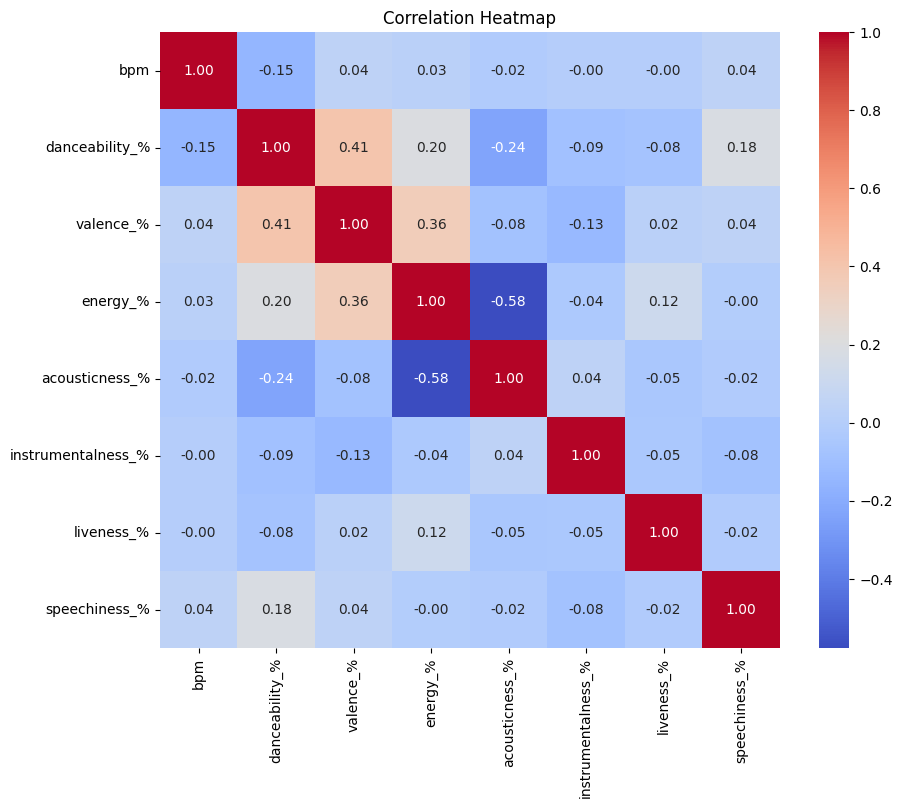

In [39]:
selected_columns = ['bpm','danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
df['combined_column'] = df[selected_columns].mean(axis=1)


correlation_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

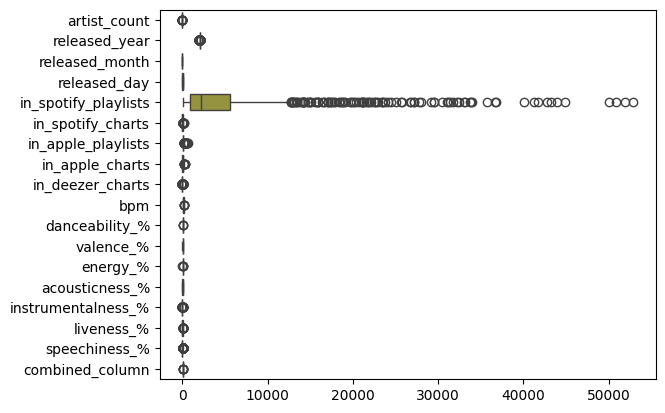

In [40]:
sns.boxplot(data=df,orient='h')

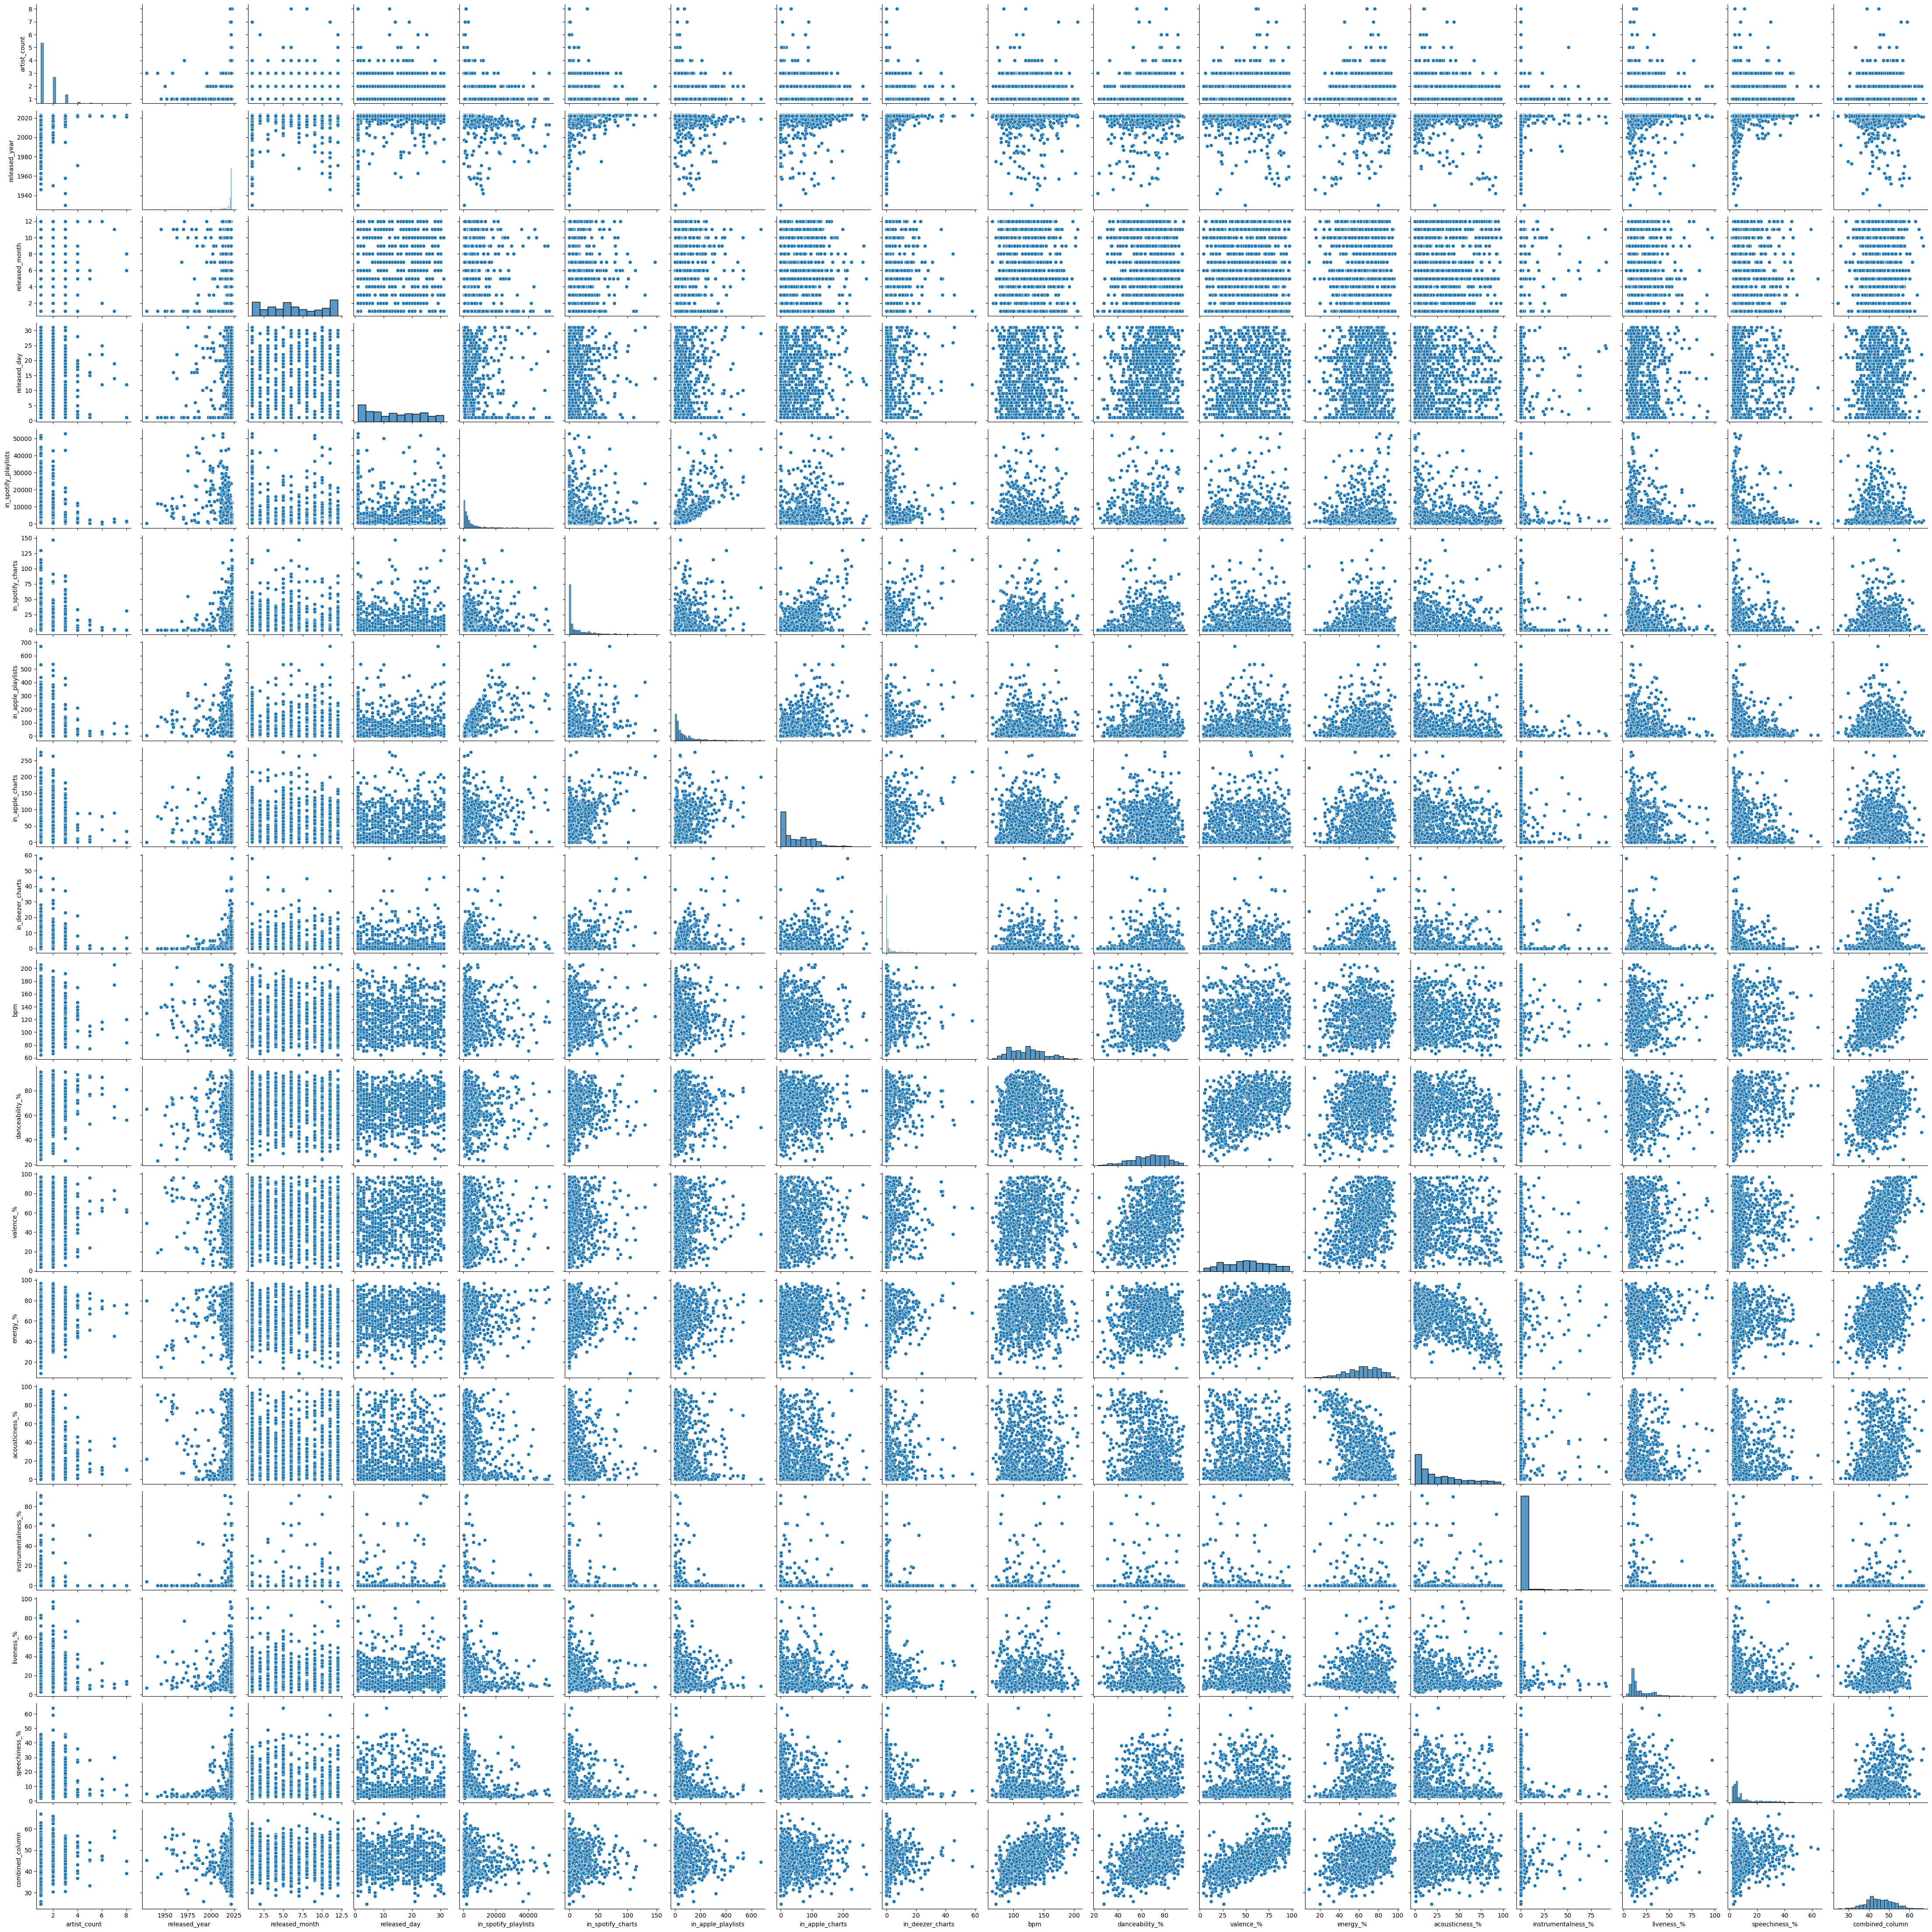

In [41]:
sns.pairplot(df)

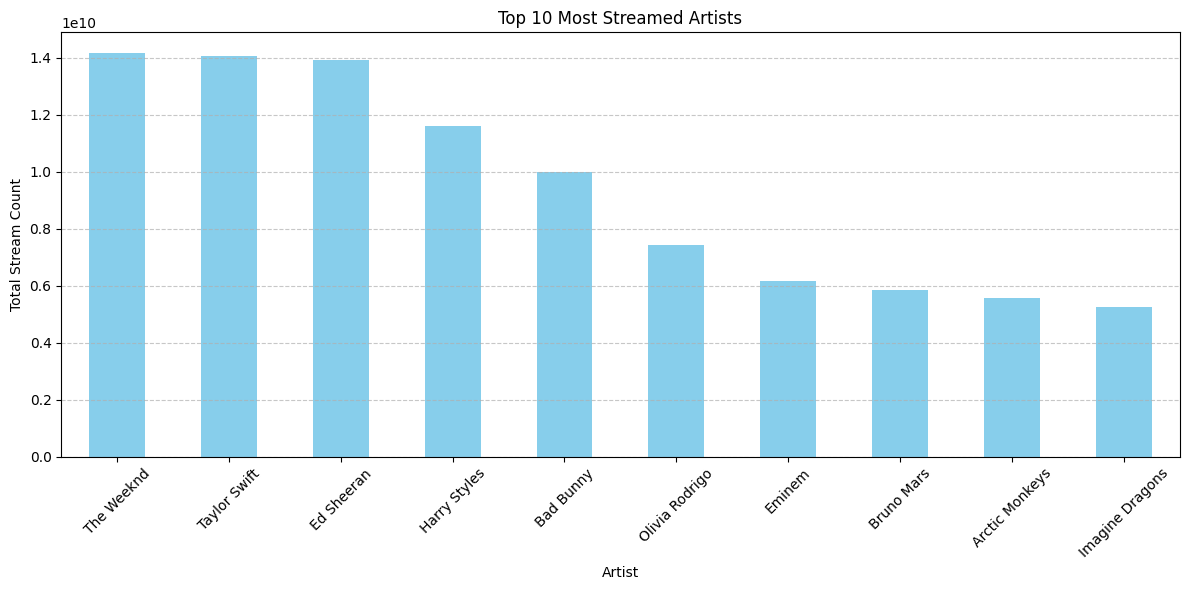

In [42]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['streams'].replace([np.inf, -np.inf], np.nan, inplace=True)

artist_streams = df.groupby('artist(s)_name')['streams'].sum()
top_artists = artist_streams.nlargest(10)

plt.figure(figsize=(12, 6))
top_artists.plot(kind='bar', color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Total Stream Count')
plt.title('Top 10 Most Streamed Artists')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

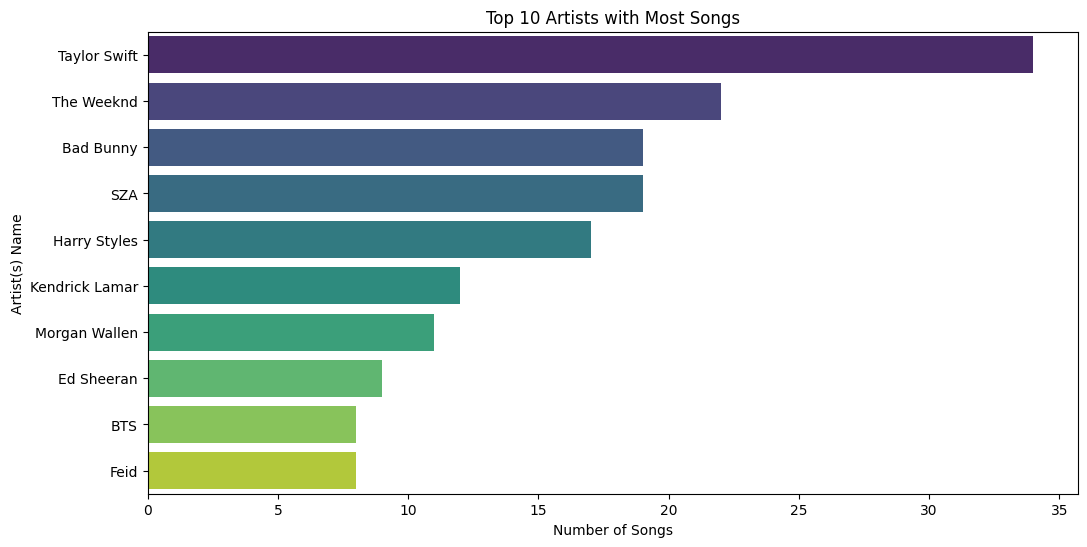

artist(s)_name
Taylor Swift      34
The Weeknd        22
Bad Bunny         19
SZA               19
Harry Styles      17
Kendrick Lamar    12
Morgan Wallen     11
Ed Sheeran         9
BTS                8
Feid               8
Name: count, dtype: int64

In [43]:
# Top 10 artists with most songs in the dataset
top_artists = df['artist(s)_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_artists.values, y=top_artists.index, hue=top_artists.index, palette='viridis', legend=False)
plt.xlabel('Number of Songs')
plt.ylabel('Artist(s) Name')
plt.title('Top 10 Artists with Most Songs')
plt.show()

top_artists

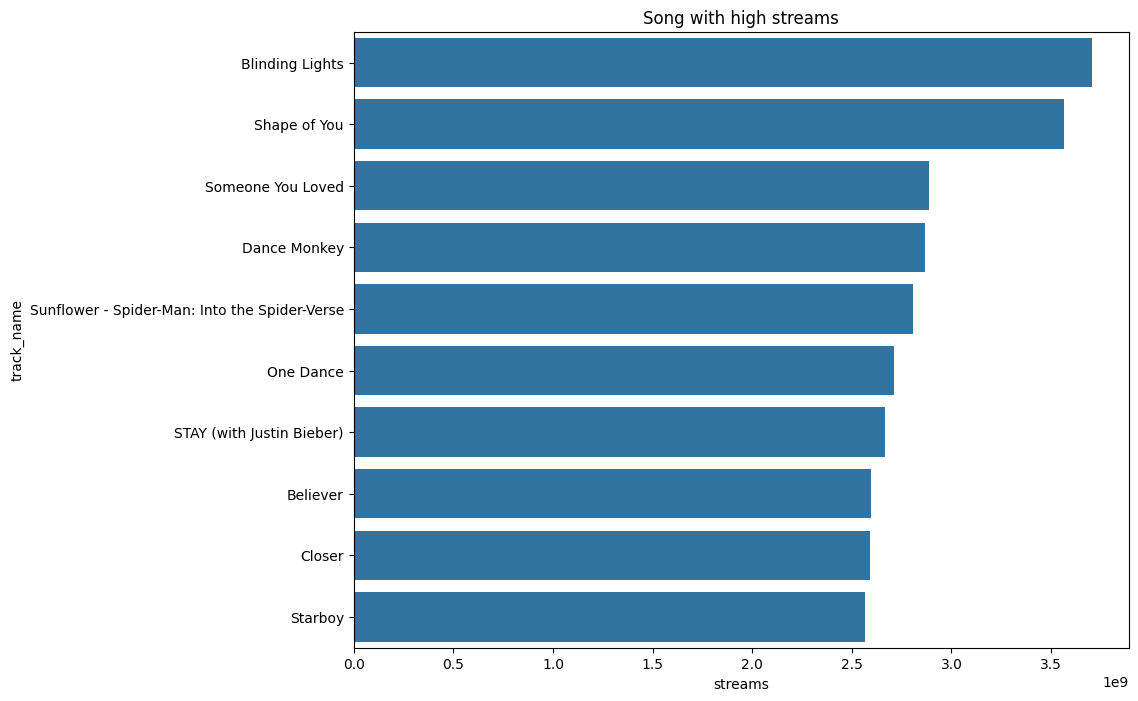

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, y='track_name', x='streams', order=df[['track_name', 'streams']].nlargest(10, 'streams')['track_name'].values)
plt.title('Song with high streams')
plt.show()

<Axes: xlabel='speechiness_%', ylabel='danceability_%'>

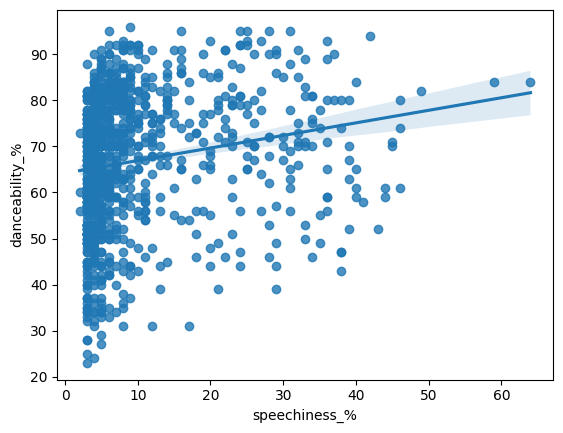

In [45]:
sns.regplot(x='speechiness_%',y='danceability_%',data=df)

<Axes: xlabel='mode', ylabel='count'>

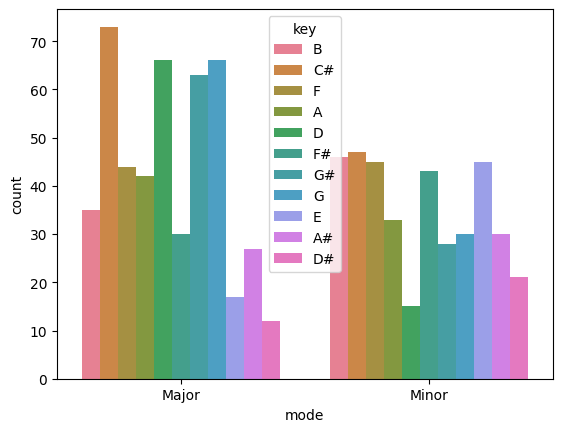

In [46]:
sns.countplot(x='mode',data=df,hue='key')